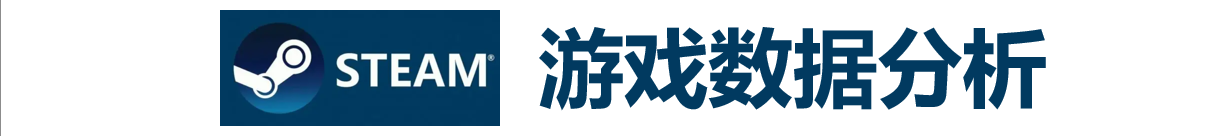

In [1]:
import pandas as pd
import numpy as np

In [2]:
vgsales=pd.read_csv("vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 指标定义说明：

#### Rank - Ranking of overall sales

#### Name - The games name

#### Platform - Platform of the games release (i.e. PC,PS4, etc.)

#### Year - Year of the game's release

#### Genre - Genre of the game

#### Publisher - Publisher of the game

#### NA_Sales - Sales in North America (in millions)

#### EU_Sales - Sales in Europe (in millions)

#### JP_Sales - Sales in Japan (in millions)

#### Other_Sales - Sales in the rest of the world (in millions)

#### Global_Sales - Total worldwide sales.

# · 项目背景

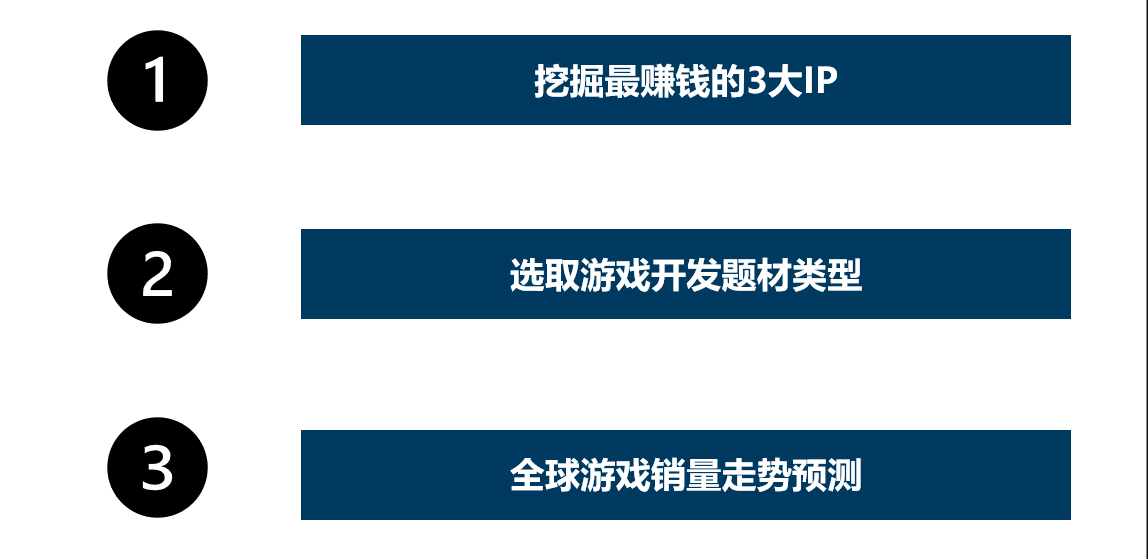

## 任务①：挖掘最赚钱的3大IP

In [3]:
vgsales['Name'].value_counts()

Need for Speed: Most Wanted                                        12
Ratatouille                                                         9
LEGO Marvel Super Heroes                                            9
Madden NFL 07                                                       9
FIFA 14                                                             9
Lego Batman 3: Beyond Gotham                                        8
LEGO Jurassic World                                                 8
LEGO Harry Potter: Years 5-7                                        8
Monopoly                                                            8
Cars                                                                8
Madden NFL 08                                                       8
Angry Birds Star Wars                                               8
LEGO Star Wars II: The Original Trilogy                             8
The LEGO Movie Videogame                                            8
FIFA Soccer 13      

### ★数据清洗：

In [4]:
#删除name字段的空值
df=vgsales.dropna(axis=0,how='any',subset=['Name'])
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
#调用str.replace()方法，使用正则表达式将大小写字母和0-9以外的所有其他内容去除 + 替换成空格
df['Name']=df['Name'].str.replace('[^0-9a-zA-Z\s]', ' ')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


★考虑到Name字段可能存在一些单元格的字符串【全部为空格】的特殊情况，需要对这种单元格做【删除处理】以排除噪音数据的干扰！

In [6]:
#新建空列表blanklist，用于存储name字段中单元格字符串【全部为空格】的行索引
blanklist=[]
for i in range(len(df['Rank'])):
    if df['Name'].iloc[i].isspace()==True:
        blanklist.append(i)

print(blanklist)

[]


In [7]:
#df1：删除单元格字符串【全部为空格】的行并重置索引
df1=df.drop(axis=0,index=blanklist)
df1.reset_index(drop=True,inplace=True)
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
#查看df1的数据规模
df1.shape

(16598, 11)

In [9]:
#对df1进行字段值首尾去空格操作
df1['Name']=df1['Name'].str.strip()
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
#t1：按照空格符号进行分割，不单独拆分成表
t1=df1['Name'].str.split(pat=' ',expand=False)
t1

0                                            [Wii, Sports]
1                                     [Super, Mario, Bros]
2                                       [Mario, Kart, Wii]
3                                    [Wii, Sports, Resort]
4                            [Pokemon, Red, Pokemon, Blue]
5                                                 [Tetris]
6                                [New, Super, Mario, Bros]
7                                              [Wii, Play]
8                         [New, Super, Mario, Bros, , Wii]
9                                             [Duck, Hunt]
10                                            [Nintendogs]
11                                       [Mario, Kart, DS]
12                        [Pokemon, Gold, Pokemon, Silver]
13                                              [Wii, Fit]
14                                        [Wii, Fit, Plus]
15                                    [Kinect, Adventures]
16                                 [Grand, Theft, Auto, 

In [11]:
#t2：数据拼接
t2=pd.concat([pd.DataFrame(t1),pd.DataFrame(df1[['Publisher','Global_Sales']])],axis=1,ignore_index=True)
t2.head()

,0,1,2
0,"[Wii, Sports]",Nintendo,82.74
1,"[Super, Mario, Bros]",Nintendo,40.24
2,"[Mario, Kart, Wii]",Nintendo,35.82
3,"[Wii, Sports, Resort]",Nintendo,33.00
4,"[Pokemon, Red, Pokemon, Blue]",Nintendo,31.37


In [12]:
#遍历循环，将t2第1列字段中除首尾以外的中间的空格删除
for i in range(df1.shape[0]):
    t2[0].loc[i]=[x.strip() for x in t2[0].loc[i] if x.strip() != '']
print(t2[0])

C:\Users\86132\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0                                            [Wii, Sports]
1                                     [Super, Mario, Bros]
2                                       [Mario, Kart, Wii]
3                                    [Wii, Sports, Resort]
4                            [Pokemon, Red, Pokemon, Blue]
5                                                 [Tetris]
6                                [New, Super, Mario, Bros]
7                                              [Wii, Play]
8                           [New, Super, Mario, Bros, Wii]
9                                             [Duck, Hunt]
10                                            [Nintendogs]
11                                       [Mario, Kart, DS]
12                        [Pokemon, Gold, Pokemon, Silver]
13                                              [Wii, Fit]
14                                        [Wii, Fit, Plus]
15                                    [Kinect, Adventures]
16                                 [Grand, Theft, Auto, 

In [13]:
#t3：对删除中间空格值的t2字段进行重组拼接，得到只包含大小写字母+数字的数据集
#t4：列名重命名
t3=pd.concat([pd.DataFrame(t2[0]),pd.DataFrame(t2[1]),pd.DataFrame(t2[2])],axis=1,ignore_index=True)
t4=t3.rename(columns={0:'Name',1:'Publisher',2:'Global_Sales'})
t4.head()

,Name,Publisher,Global_Sales
0,"[Wii, Sports]",Nintendo,82.74
1,"[Super, Mario, Bros]",Nintendo,40.24
2,"[Mario, Kart, Wii]",Nintendo,35.82
3,"[Wii, Sports, Resort]",Nintendo,33.00
4,"[Pokemon, Red, Pokemon, Blue]",Nintendo,31.37


In [14]:
#x1：将t4的Name字段数据以空格符进行连接重新整合，这样就得到了清洗完毕的数据，清洗完毕的数据具有以下特点：
#1、首尾无空格
#2、除首尾以外的部位，单词与单词之间只有1个空格
#3、游戏名称只包含大小写英文字母和数字
x1=[]
for i in range(df1.shape[0]):
    x1.append(' '.join(t4['Name'].loc[i]))
x1=pd.DataFrame(x1)
x1.head()

,0
0,Wii Sports
1,Super Mario Bros
2,Mario Kart Wii
3,Wii Sports Resort
4,Pokemon Red Pokemon Blue


In [15]:
#t5：对x1和t2第二列字段进行重组拼接，同时对列名重命名
t5=pd.concat([pd.DataFrame(x1[0]),pd.DataFrame(t4['Publisher']),pd.DataFrame(t4['Global_Sales'])],axis=1,ignore_index=True)
t5.rename(columns={0:'Name',1:'Publisher',2:'Global_Sales'},inplace=True)
t5.head()

,Name,Publisher,Global_Sales
0,Wii Sports,Nintendo,82.74
1,Super Mario Bros,Nintendo,40.24
2,Mario Kart Wii,Nintendo,35.82
3,Wii Sports Resort,Nintendo,33.00
4,Pokemon Red Pokemon Blue,Nintendo,31.37


至此，Name字段的数据清洗工作完成，进入后续环节

In [16]:
#f1：读取2022vgfranchises表格文件（2022vgfranchises表的“Franchise Name”字段存储了游戏IP数据）
f1=pd.read_excel('2022vgfranchises.xlsx')
f1.head()

,Category,Franchise name,Original release date,Sales（million）,DataResource
0,At least 200 million copies,Mario,1981-07-09 00:00:00,760.21,https://en.wikipedia.org/wiki/List_of_best-sel...
1,NaN,Tetris,1988-01-29 00:00:00,495.00,NaN
2,NaN,Pokémon,1996-02-27 00:00:00,440.00,NaN
3,NaN,Call of Duty,2003-10-29 00:00:00,425.00,NaN
4,NaN,Super Mario,1985-09-13 00:00:00,383.54,NaN


In [17]:
#调用str.replace()方法，使用正则表达式将大小写字母和0-9以外的所有其他内容去除 + 替换成空格
f1['Franchise Name']=f1['Franchise name'].str.replace('[^0-9a-zA-Z\s]', ' ')
f1.head()

,Category,Franchise name,Original release date,Sales（million）,DataResource,Franchise Name
0,At least 200 million copies,Mario,1981-07-09 00:00:00,760.21,https://en.wikipedia.org/wiki/List_of_best-sel...,Mario
1,NaN,Tetris,1988-01-29 00:00:00,495.00,NaN,Tetris
2,NaN,Pokémon,1996-02-27 00:00:00,440.00,NaN,Pok mon
3,NaN,Call of Duty,2003-10-29 00:00:00,425.00,NaN,Call of Duty
4,NaN,Super Mario,1985-09-13 00:00:00,383.54,NaN,Super Mario


In [18]:
#对f1进行字段值首尾去空格操作
f1['Franchise name']=f1['Franchise name'].str.strip()
f1.head()

,Category,Franchise name,Original release date,Sales（million）,DataResource,Franchise Name
0,At least 200 million copies,Mario,1981-07-09 00:00:00,760.21,https://en.wikipedia.org/wiki/List_of_best-sel...,Mario
1,NaN,Tetris,1988-01-29 00:00:00,495.00,NaN,Tetris
2,NaN,Pokémon,1996-02-27 00:00:00,440.00,NaN,Pok mon
3,NaN,Call of Duty,2003-10-29 00:00:00,425.00,NaN,Call of Duty
4,NaN,Super Mario,1985-09-13 00:00:00,383.54,NaN,Super Mario


In [19]:
#f2：按照空格符号进行分割，不单独拆分成表
f2=f1['Franchise name'].str.split(pat=' ',expand=False)
f2=pd.DataFrame(f2)
f2.head()

,Franchise name
0,[Mario]
1,[Tetris]
2,[Pokémon]
3,"[Call, of, Duty]"
4,"[Super, Mario]"


In [20]:
#遍历循环，将f2的“Franchise Name”字段中除首尾以外的中间的空格删除
for i in range(f2.shape[0]):
    f2['Franchise name'].loc[i]=[x.strip() for x in f2['Franchise name'].loc[i] if x.strip() != '']
print(f2)

                     Franchise name
0                           [Mario]
1                          [Tetris]
2                         [Pokémon]
3                  [Call, of, Duty]
4                    [Super, Mario]
5              [Grand, Theft, Auto]
6                            [FIFA]
7                       [Minecraft]
8                             [Wii]
9                            [Lego]
10                      [The, Sims]
11              [Assassin's, Creed]
12                 [Final, Fantasy]
13                    [Mario, Kart]
14           [Sonic, the, Hedgehog]
15               [Need, for, Speed]
16                    [Madden, NFL]
17         [The, Legend, of, Zelda]
18                 [Resident, Evil]
19                     [Star, Wars]
20                        [NBA, 2K]
21                    [Wii, Sports]
22         [Pro, Evolution, Soccer]
23                   [Tomb, Raider]
24                  [Dragon, Quest]
25                [Monster, Hunter]
26                  [Tom, Cl

In [21]:
#f3：将f2的“Franchise name”字段数据以空格符进行连接重新整合，这样就得到了清洗完毕的数据，清洗完毕的数据具有以下特点：
#1、首尾无空格
#2、除首尾以外的部位，单词与单词之间只有1个空格
#3、游戏名称只包含大小写英文字母和数字
f3=[]
for i in range(f2.shape[0]):
    f3.append(' '.join(f2['Franchise name'].loc[i]))
f3=pd.DataFrame(f3)
f3.rename(columns={0:'IP'},inplace=True)
f3.reset_index(drop=True,inplace=True)
f3.head()

,IP
0,Mario
1,Tetris
2,Pokémon
3,Call of Duty
4,Super Mario


In [22]:
#t6：数据分割成新表
t6=t5['Name'].str.split(pat=' ',expand=True)
t6.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Wii,Sports,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Super,Mario,Bros,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Mario,Kart,Wii,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Wii,Sports,Resort,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Pokemon,Red,Pokemon,Blue,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [23]:
#t7：将t6的前两列合并成一列
t7=t6[0].str.cat(t6[1],sep=' ')
t7=pd.DataFrame(t7)
t7.head(10)

,0
0,Wii Sports
1,Super Mario
2,Mario Kart
3,Wii Sports
4,Pokemon Red
5,NaN
6,New Super
7,Wii Play
8,New Super
9,Duck Hunt


In [24]:
#t8：对t7进行计数统计
t8=pd.DataFrame(t7[0].value_counts())
t8.reset_index(drop=False,inplace=True)
t8.rename(columns={'index':'NickIP',0:'Number'},inplace=True)
t8.head()

,NickIP,Number
0,Madden NFL,96
1,Tom Clancy,85
2,Star Wars,83
3,Final Fantasy,78
4,Disney s,75


In [25]:
#查看游戏名字符包含前3个NickIP的游戏
print(f3['IP'][f3['IP'].str.contains(t8['NickIP'].loc[0])])
print(f3['IP'][f3['IP'].str.contains(t8['NickIP'].loc[1])])
print(f3['IP'][f3['IP'].str.contains(t8['NickIP'].loc[2])])

16    Madden NFL
Name: IP, dtype: object
26                  Tom Clancy's
75    Tom Clancy's Splinter Cell
89      Tom Clancy's Rainbow Six
94      Tom Clancy's Ghost Recon
Name: IP, dtype: object
19                 Star Wars
51            Lego Star Wars
59    Star Wars: Battlefront
Name: IP, dtype: object


In [26]:
#t9：前3大IP及名下开发游戏数量
t8['NickIP'].loc[1]="Tom Clancy's"
t8.rename(columns={'NickIP':'IP','Number':'此IP名下游戏数量'},inplace=True)
t9=t8.head(3)
t9

,IP,此IP名下游戏数量
0,Madden NFL,96
1,Tom Clancy's,85
2,Star Wars,83


## 任务②：抉择开发游戏的题材类型

In [27]:
steamorg=pd.read_csv('steam.csv')
steamorg.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


### 指标定义说明：

#### 1、 appid：Unique identifier for each title
#### 2、 name：Title of app (game)
#### 3、 release_date：Release date in format YYYY-MM-DD
#### 4、 english：Language support: 1 if is in English
#### 5、 developer：Name (or names) of developer(s). Semicolon delimited if multiple
#### 6、 publisher：Name (or names) of publisher(s). Semicolon delimited if multiple
#### 7、 platforms：Semicolon delimited list of supported platforms. At most includes: windows;mac;linux
#### 8、 required_age：Minimum required age according to PEGI UK standards. Many with 0 are unrated or unsupplied.
#### 9、 categories：Semicolon delimited list of game categories, e.g. single-player;multi-player
#### 10、 genres：Semicolon delimited list of game genres, e.g. action;adventure
#### 11、 steamspy_tags：Semicolon delimited list of top steamspy game tags, similar to genres but community voted, e.g. action;adventure
#### 12、 achievements：Number of in-games achievements, if any
#### 13、 positive_ratings：Number of positive ratings, from SteamSpy
#### 14、 negative_ratings：Number of negative ratings, from SteamSpy
#### 15、 average_playtime：Average user playtime, from SteamSpy
#### 16、 median_playtime：Median user playtime, from SteamSpy
#### 17、 owners：Estimated number of owners. Contains lower and upper bound (like 20000-50000). May wish to take mid-point or lower
#### 18、 price：Current full price of title in GBP, (pounds sterling)

In [28]:
steamorg['genres'].value_counts()

Action;Indie                                                                                             1852
Casual;Indie                                                                                             1482
Action;Adventure;Indie                                                                                   1229
Adventure;Indie                                                                                          1170
Action;Casual;Indie                                                                                      1004
Action                                                                                                    843
Adventure;Casual;Indie                                                                                    801
Indie                                                                                                     759
Casual                                                                                                    560
Adventure 

通过对游戏题材的统计结果可知，游戏题材有归属1种和多种的情况，所以需要对题材进行划分统计

例如：游戏A的题材为Action和Adventure，那就在统计题材为Action和Adventure的游戏时次数各+1

In [29]:
#删除“genres”字段空值数据，并删除空格符#
d1=steamorg.dropna(axis='index',subset=['genres']).applymap((lambda x: "".join(x.split()) if type(x) is str else x))
d1.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;OnlineMulti-Player;LocalMulti-Pla...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,TeamFortressClassic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;OnlineMulti-Player;LocalMulti-Pla...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,DayofDefeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;ValveAnti-Cheatenabled,Action,FPS;WorldWarII;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,DeathmatchClassic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;OnlineMulti-Player;LocalMulti-Pla...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life:OpposingForce,1999-11-01,1,GearboxSoftware,Valve,windows;mac;linux,0,Single-player;Multi-player;ValveAnti-Cheatenabled,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [30]:
#统计各游戏题材对应的游戏数量
d2=pd.DataFrame(np.array(d1['genres'].str.split(pat=";",expand=True)).reshape(-1,1)).dropna(axis='index',subset=[0])
d2[0].value_counts()

Indie                   19421
Action                  11903
Casual                  10210
Adventure               10032
Strategy                 5247
Simulation               5194
RPG                      4311
EarlyAccess              2954
FreetoPlay               1704
Sports                   1322
Racing                   1024
Violent                   843
MassivelyMultiplayer      723
Gore                      537
Nudity                    266
SexualContent             245
Utilities                 146
Design&Illustration        87
Animation&Modeling         79
Education                  51
VideoProduction            38
SoftwareTraining           31
AudioProduction            29
WebPublishing              28
GameDevelopment            17
PhotoEditing               12
Accounting                  6
Tutorial                    1
Documentary                 1
Name: 0, dtype: int64

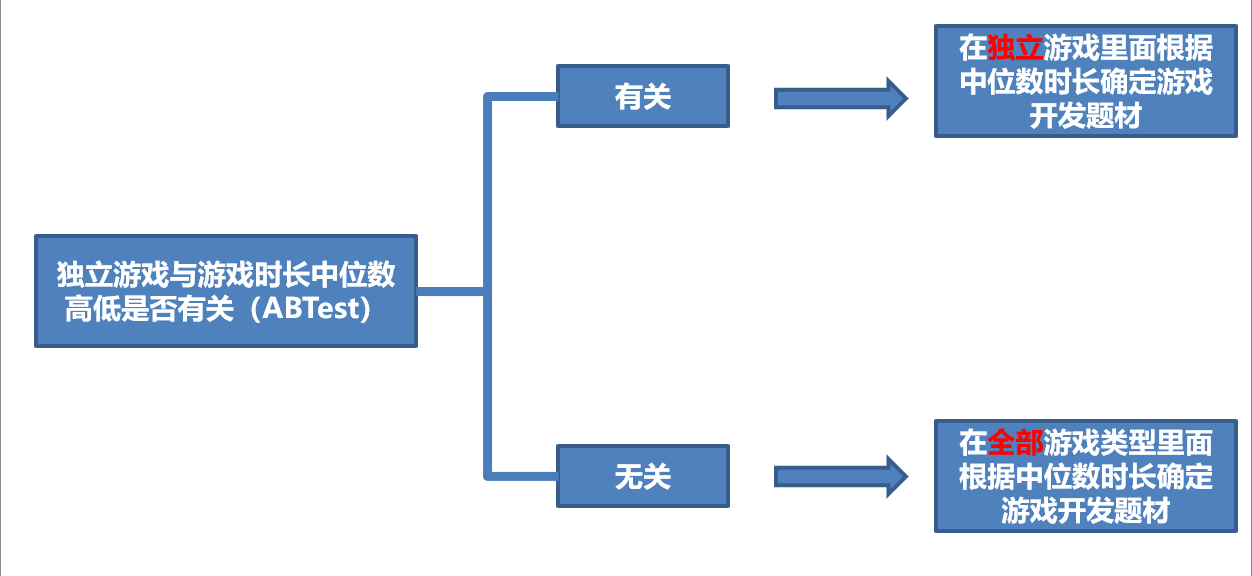

In [31]:
d1['median_playtime'].describe()

count     27075.00000
mean        146.05603
std        2353.88008
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max      190625.00000
Name: median_playtime, dtype: float64

In [32]:
#higher_or_lower：游戏时长中位数高低分割线
higher_or_lower=d1['median_playtime'].describe().iloc[1]
higher_or_lower

146.0560295475531

In [33]:
d3=d1[['name','genres','median_playtime']]
d3.head()

,name,genres,median_playtime
0,Counter-Strike,Action,317
1,TeamFortressClassic,Action,62
2,DayofDefeat,Action,34
3,DeathmatchClassic,Action,184
4,Half-Life:OpposingForce,Action,415


In [34]:
d3['high_or_low']=''
#使用pd.cut方法进行数据分箱，实现区分游戏时长中位数高低的目的#
listbins=[0,higher_or_lower,d1['median_playtime'].describe().iloc[7]]#数据分箱的区间左值和右值
listlabels=['游戏时长中位数较低','游戏时长中位数较高']#分箱的标签数据
d3['high_or_low']=pd.cut(x=d3['median_playtime'],bins=listbins, labels=listlabels, include_lowest=True)
d3.head()

C:\Users\86132\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\86132\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,name,genres,median_playtime,high_or_low
0,Counter-Strike,Action,317,游戏时长中位数较高
1,TeamFortressClassic,Action,62,游戏时长中位数较低
2,DayofDefeat,Action,34,游戏时长中位数较低
3,DeathmatchClassic,Action,184,游戏时长中位数较高
4,Half-Life:OpposingForce,Action,415,游戏时长中位数较高


In [35]:
temp_01=[]
for i in range(d3.shape[0]):
    if d3['high_or_low'].iloc[i]=='游戏时长中位数较低':
        temp_01.append(0)
    else:
        temp_01.append(1)
        
d4=d3.join(pd.DataFrame(temp_01),how='left')
d4.rename(columns={0:'hl_numberic'},inplace=True)
d4.head()

,name,genres,median_playtime,high_or_low,hl_numberic
0,Counter-Strike,Action,317,游戏时长中位数较高,1
1,TeamFortressClassic,Action,62,游戏时长中位数较低,0
2,DayofDefeat,Action,34,游戏时长中位数较低,0
3,DeathmatchClassic,Action,184,游戏时长中位数较高,1
4,Half-Life:OpposingForce,Action,415,游戏时长中位数较高,1


hl_numberic : 游戏时长中位数较高为 1 ，否则为 0

In [36]:
d5=pd.DataFrame(d4['genres'].str.contains('Indie'))
d5.rename(columns={'genres':'whether_indie'},inplace=True)
d6=d4.join(d5,how='left')
d6.head(10)

,name,genres,median_playtime,high_or_low,hl_numberic,whether_indie
0,Counter-Strike,Action,317,游戏时长中位数较高,1,False
1,TeamFortressClassic,Action,62,游戏时长中位数较低,0,False
2,DayofDefeat,Action,34,游戏时长中位数较低,0,False
3,DeathmatchClassic,Action,184,游戏时长中位数较高,1,False
4,Half-Life:OpposingForce,Action,415,游戏时长中位数较高,1,False
5,Ricochet,Action,10,游戏时长中位数较低,0,False
6,Half-Life,Action,83,游戏时长中位数较低,0,False
7,Counter-Strike:ConditionZero,Action,43,游戏时长中位数较低,0,False
8,Half-Life:BlueShift,Action,205,游戏时长中位数较高,1,False
9,Half-Life2,Action,402,游戏时长中位数较高,1,False


In [37]:
#计算name字段是否有重复值及其数量
d7=pd.DataFrame(d6['name'].duplicated().value_counts())
d7

,name
False,27032
True,43


In [38]:
#有重复值，去重处理
d8=d6.drop_duplicates(subset=['name'])
d8.head()

,name,genres,median_playtime,high_or_low,hl_numberic,whether_indie
0,Counter-Strike,Action,317,游戏时长中位数较高,1,False
1,TeamFortressClassic,Action,62,游戏时长中位数较低,0,False
2,DayofDefeat,Action,34,游戏时长中位数较低,0,False
3,DeathmatchClassic,Action,184,游戏时长中位数较高,1,False
4,Half-Life:OpposingForce,Action,415,游戏时长中位数较高,1,False


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

查看数据去重处理完毕后的全部游戏时长中位数较高的比例

In [40]:
d8['hl_numberic'].mean()

0.14819473216928086

查看独立游戏的游戏时长中位数较高的比例

In [41]:
d8.query("whether_indie==True")['hl_numberic'].mean()

0.13728018152751276

查看非独立游戏的游戏时长中位数较高的比例

In [42]:
d8.query("whether_indie==False")['hl_numberic'].mean()

0.17589320769532785

查看以上数据，目前并没有直接证据有效证明“是否为独立游戏”与“游戏时长中位数较高的比例”有关

# A/B TEST（样本量大于30，采用Z检验)
#### 将‘whether_indie’字段与‘hl_numberic’字段进行结合比较

#### 设定：
#### PI(独立游戏组游戏时长中位数较高的比例)，PI_NOT(非独立游戏组游戏时长中位数较高的比例)

#### 给出对应零假设与备择假设：

#### 零假设H0：PI=PI_NOT（独立游戏组与非独立游戏组样本不存在显著性差异）
#### 备择假设H1：PI≠PI_NOT（独立游戏组与非独立游戏组样本存在显著性差异）

#### α为第1类错误容许值，一般取0.05。当P值<α时，拒绝零假设，接受备择假设，认为两个样本存在显著性差异

In [43]:
#d9：按照whether_indie字段进行聚合计算出hl_numberic的平均值、标准差、样本数
d9=d8.groupby(by=['whether_indie'])['hl_numberic'].agg(["mean", "std", "count"])
d9

,mean,std,count
whether_indie,,,
False,0.175893,0.380754,7641
True,0.137280,0.344152,19391


In [44]:
#d10：统计整体数据，计算出hl_numberic的平均值、标准差、样本数
d10=d8['hl_numberic'].agg(["mean", "std", "count"])
d10=pd.DataFrame(d10).T
d10

,mean,std,count
hl_numberic,0.148195,0.355299,27032.0


In [45]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

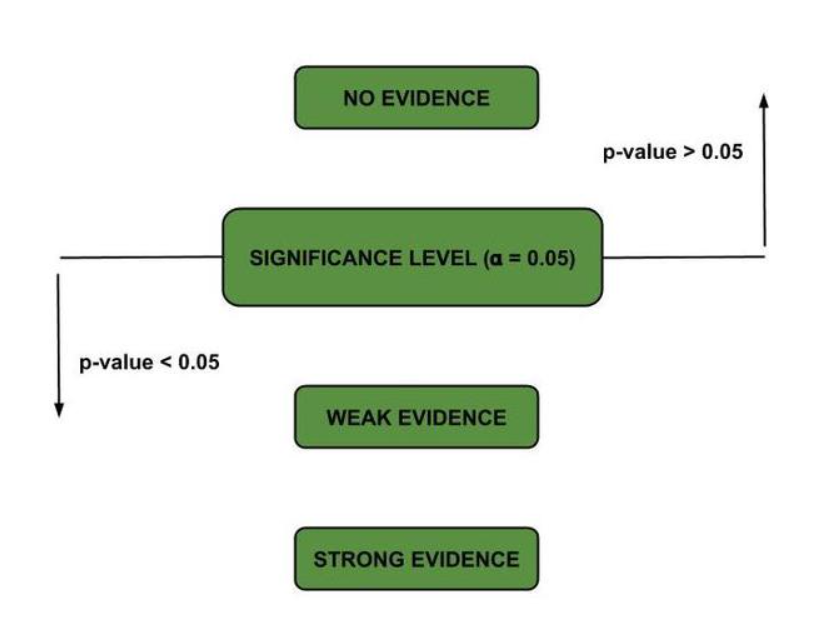

In [46]:
#在零假设中，PI（独立游戏组游戏时长中位数较高的比例）
PI=d8['hl_numberic'].mean()
PI

0.14819473216928086

In [47]:
#在零假设中，PI_NOT（非独立游戏组游戏时长中位数较高的比例）
PI_NOT=d8['hl_numberic'].mean()
PI_NOT

0.14819473216928086

In [48]:
#n_I：独立游戏数量
n_I=d8.query('whether_indie==True')['name'].count()
n_I=int(n_I)
n_I

19391

In [49]:
#n_I_NOT：非独立游戏数量
n_I_NOT=d8.query('whether_indie==False')['name'].count()
n_I_NOT=int(n_I_NOT)
n_I_NOT

7641

In [50]:
import random
random.seed(42)

在零假设中，用PI（独立游戏组游戏时长中位数较高的比例）模拟n_I个游戏时长中位数较高与否，并将其存储在I_Played中

★在本例中只有 0 和 1 两种情况 所以用二项分布功能

In [51]:
I_Played=np.random.binomial(1,PI,n_I)
I_Played

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
I_Played.shape[0]

19391

在零假设中，用PI_NOT（非独立游戏组游戏时长中位数较高的比例）模拟n_I_NOT个游戏时长中位数较高与否，并将其存储在I_NOT_Played中

★在本例中只有 0 和 1 两种情况 所以用二项分布功能

In [53]:
I_NOT_Played=np.random.binomial(1,PI_NOT,n_I_NOT)
I_NOT_Played

array([0, 0, 0, ..., 1, 0, 0])

In [54]:
I_NOT_Played.shape[0]

7641

★I_Played组有19391个数据，I_NOT_Played组有7641个数据，为了对比两组差异性，以个数少的组为准，调整I_Played取值范围直至两组个数相等

In [55]:
#计算I_Played组与I_NOT_Played的差异值
I_Played=I_Played[:7641]
I_Played.mean()-I_NOT_Played.mean()

0.005365789818086636

参考以上过程，模拟10000次I_Played组与I_NOT_Played组的差异值，并将其存储在P_diff中

In [56]:
P_diff=[]

for _ in range(10000):
    I_Played=np.random.binomial(1,PI,n_I)
    I_NOT_Played=np.random.binomial(1,PI_NOT,n_I_NOT)
    P_diff.append(I_Played.mean()-I_NOT_Played.mean())

用P_diff数据绘制hist直方图

C:\Users\86132\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


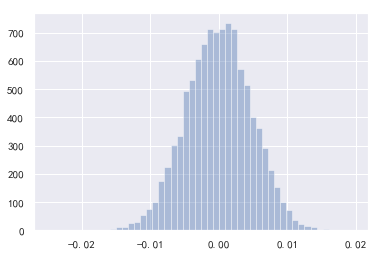

In [57]:
sns.distplot(P_diff, hist=True, kde=False)

plt.show()

从图形结果来看符合预期

在P_diff列表的数值中，求解大于d8中观察到的实际独立与非独立游戏时长中位数较高的占比的差异的比值（即P值）

In [58]:
actual_diff=(d8[d8['whether_indie'] == True]['hl_numberic'].mean()) - (d8[d8['whether_indie'] == False]['hl_numberic'].mean())

actual_diff

-0.03861302616781509

In [59]:
P_diff=np.array(P_diff)
p_value=(P_diff>actual_diff).mean()
p_value

1.0

#### 简要说明：
#### p_value在科学上称为p值，它确定了在原假设为真的情况下获得我们观察到的统计数据的概率。

#### 经过计算，p_value为1，说明原假设不成立

### ★ 得到第1步结论：“游戏是否为独立游戏”与“游戏时长中位数高低”有关

### ★ 根据上述结论，需要在“独立”游戏类型中根据游戏时长中位数高低来选择开发的游戏题材

In [60]:
d9=d8[d8['whether_indie']==True].groupby(by=['genres'])['median_playtime'].agg(["mean", "count"])
d9.sort_values(by=['mean','count'],ascending=False,inplace=True)
d9.head(10)

,mean,count
genres,,
FreetoPlay;Indie;RPG;Strategy,23988.875000,8
Indie;MassivelyMultiplayer;Strategy,7768.600000,5
Action;Adventure;Indie;MassivelyMultiplayer;RPG,4583.307692,13
Adventure;Casual;FreetoPlay;Indie,3908.306122,49
Action;Adventure;FreetoPlay;Indie;Strategy;EarlyAccess,3648.000000,1
Action;Casual;Indie;MassivelyMultiplayer;Strategy;EarlyAccess,3235.666667,3
Casual;Indie;RPG;Simulation,2015.000000,37
Adventure;Casual;FreetoPlay;Indie;MassivelyMultiplayer;RPG;Strategy,1928.250000,4
Adventure;FreetoPlay;Indie;RPG;EarlyAccess,1743.333333,3


#### 对以上对按题材分类的游戏时长中位数的均值、游戏数量的统计结果取前10的数据，进行横向对比

#### 最终与项目组敲定游戏开发题材选定为：【Adventure（冒险）】

## 任务③：全球游戏销量走势预测

In [61]:
vgsales_01=vgsales
vgsales_01.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [62]:
vgsales_02=vgsales_01[vgsales_01['Genre'].str.contains('Adventure')]
vgsales_02

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
158,159,Assassin's Creed,X360,2007,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55
218,219,Assassin's Creed,PS3,2007,Adventure,Ubisoft,1.91,2.00,0.09,0.83,4.83
251,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
400,401,Rugrats: Search For Reptar,PS,1998,Adventure,THQ,1.63,1.53,0.00,0.18,3.34
417,418,L.A. Noire,PS3,2011,Adventure,Take-Two Interactive,1.27,1.33,0.12,0.51,3.23
434,435,Club Penguin: Elite Penguin Force,DS,2008,Adventure,Disney Interactive Studios,1.88,0.98,0.00,0.30,3.16
447,448,Heavy Rain,PS3,2010,Adventure,Sony Computer Entertainment,1.29,1.27,0.06,0.50,3.12
521,522,Myst,PC,1994,Adventure,Red Orb,0.02,2.79,0.00,0.00,2.81
549,550,L.A. Noire,X360,2011,Adventure,Take-Two Interactive,1.52,0.94,0.02,0.24,2.72


### 指标定义说明：

#### Rank - Ranking of overall sales

#### Name - The games name

#### Platform - Platform of the games release (i.e. PC,PS4, etc.)

#### Year - Year of the game's release

#### Genre - Genre of the game

#### Publisher - Publisher of the game

#### NA_Sales - Sales in North America (in millions)

#### EU_Sales - Sales in Europe (in millions)

#### JP_Sales - Sales in Japan (in millions)

#### Other_Sales - Sales in the rest of the world (in millions)

#### Global_Sales - Total worldwide sales.

In [63]:
from scipy import stats
import matplotlib.pyplot as plt
import warnings
# 忽略警告
warnings.filterwarnings('ignore') 
# 使用 ggplot 画图风格
plt.style.use('ggplot')
%matplotlib inline

In [64]:
# 查看数据维度
vgsales_02.shape

(1284, 11)

In [65]:
#查看数据类型信息
vgsales_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 50 to 16591
Data columns (total 11 columns):
Rank            1284 non-null int64
Name            1284 non-null object
Platform        1284 non-null object
Year            1274 non-null object
Genre           1284 non-null object
Publisher       1280 non-null object
NA_Sales        1284 non-null float64
EU_Sales        1284 non-null float64
JP_Sales        1284 non-null float64
Other_Sales     1284 non-null float64
Global_Sales    1284 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 120.4+ KB


In [66]:
# 查看数据特征类型, 即除Global_Sales的列，有数值类型(numerical)和类别类型（category）
# 统计数值类型(numerical)特征名，保存为列表
numeric=[f for f in vgsales_02.drop(['Global_Sales'],axis=1).columns 
         if vgsales_02.drop(['Global_Sales'],axis=1).dtypes[f]!='object']
# 统计类别类型（category）特征名，保存为列表
category=[f for f in vgsales_02.drop(['Global_Sales'],axis=1).columns 
          if vgsales_02.drop(['Global_Sales'],axis=1).dtypes[f]=='object']
# 输出数值类型(numerical)特征个数，类型（category）特征个数
print("numeric: {}, category: {}" .format (len(numeric),len(category)))

numeric: 5, category: 5


In [67]:
# 统计每个特征的缺失数
missing = vgsales_02.isnull().sum()
# 将缺失数从大到小排序
missing.sort_values(inplace=True,ascending=False)
# 选取缺失数大于0的特征
missing = missing[missing > 0]
# 保存含缺失值特征的类型
types = vgsales_02[missing.index].dtypes
# 计算缺失值百分比
percent = missing / vgsales_02.shape[0]
# 将缺失值信息整合
missing_data = pd.concat([missing, percent,types],axis=1,
                         keys=['Total', 'Percent','Types'])
# 输出缺失值信息
missing_data

,Total,Percent,Types
Year,10,0.007788,object
Publisher,4,0.003115,object


In [68]:
vgsales_02.dropna(axis=0,how='any',inplace=True)

In [69]:
# 查看是否还有空值，最终结果为空即不存在
vgsales_02.isnull().sum()[vgsales_02.isnull().sum() > 0]

Series([], dtype: int64)

In [70]:
# 分析Global_Sales
# 查看Global_Sales均值，方差，最大最小等值，检查是否正常
vgsales_02['Global_Sales'].describe()

count    1272.000000
mean        0.184332
std         0.511280
min         0.010000
25%         0.020000
50%         0.060000
75%         0.160000
max        11.180000
Name: Global_Sales, dtype: float64

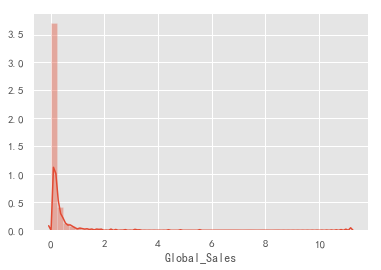

In [71]:
# 可视化展示'price'分布情况
# 画出概率密度图
sns.distplot(vgsales_02['Global_Sales'])
plt.show()

In [72]:
# 偏度skewness and 峰度kurtosis计算
# 偏度值离0越远，则越偏
print("Skewness: %f" % vgsales_02['Global_Sales'].skew())
print("Kurtosis: %f" % vgsales_02['Global_Sales'].kurt())

Skewness: 11.182276
Kurtosis: 191.312935


In [73]:
#查看异常值比例
#vgsales_02:异常值(与均值之差超过2倍标准差)
vgsales_03=vgsales_02[(vgsales_02['Global_Sales']-vgsales_02['Global_Sales'].mean())>2*vgsales_02['Global_Sales'].std()]
outlier_01_pct=vgsales_03.shape[0] / vgsales_02.shape[0]
print('异常值比例是：'+str(outlier_01_pct))

异常值比例是：0.02437106918238994


异常值比例仅为2%出头，选择直接删除

In [74]:
vgsales_04=vgsales_02[(vgsales_02['Global_Sales']-vgsales_02['Global_Sales'].mean())<=2*vgsales_02['Global_Sales'].std()]
vgsales_04.shape

(1241, 11)

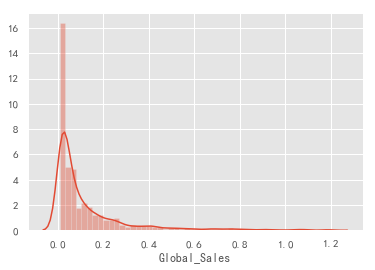

In [75]:
# 可视化展示'Global_Sales'分布情况
# 画出概率密度图
sns.distplot(vgsales_04['Global_Sales'])
plt.show()

In [76]:
#偏度skewness and 峰度kurtosis计算
print("Skewness: %f" % vgsales_04['Global_Sales'].skew())
print("Kurtosis: %f" % vgsales_04['Global_Sales'].kurt())

Skewness: 2.875686
Kurtosis: 9.593099


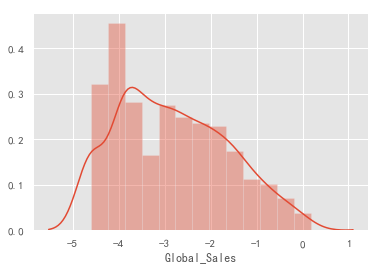

In [77]:
#偏度大于0.75，左偏，使用ln（x+1）对数进行转化
vgsales_04['Global_Sales'] = np.log(vgsales_04['Global_Sales'])
# 画出概率密度图
sns.distplot(vgsales_04['Global_Sales'])
plt.show()

In [78]:
#转化后，重新对偏度skewness and 峰度kurtosis计算
print("Skewness: %f" % vgsales_04['Global_Sales'].skew())
print("Kurtosis: %f" % vgsales_04['Global_Sales'].kurt())

Skewness: 0.337451
Kurtosis: -0.724082


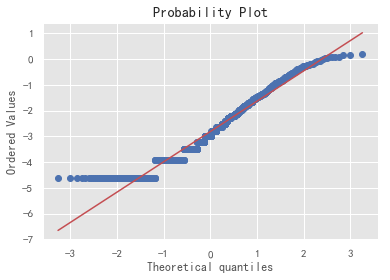

In [79]:
# 画qq图，该图斜率表示标准差，截距为均值，
# 查看price是否服从正态分布
# 越接近直线，越显正态性
res = stats.probplot(vgsales_04['Global_Sales'], plot=plt)

In [80]:
# 查看数据维度
vgsales_04.shape

(1241, 11)

In [81]:
vgsales_04.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1682,1684,Pok茅Park Wii: Pikachu's Adventure,Wii,2009,Adventure,Nintendo,0.55,0.17,0.42,0.06,0.182322
1704,1706,Metal Gear Solid VR Missions,PS,1999,Adventure,Konami Digital Entertainment,0.66,0.45,0.00,0.08,0.165514
1709,1711,Shenmue,DC,1999,Adventure,Sega,0.52,0.24,0.38,0.04,0.165514
1873,1875,Yakuza 2,PS2,2006,Adventure,Sega,0.05,0.04,0.84,0.16,0.086178
1890,1892,Endless Ocean,Wii,2007,Adventure,Nintendo,0.44,0.47,0.09,0.09,0.086178


In [82]:
# 相关性分析
# 数值型数据分析
# 计算所有数值型特征与游戏售价的相关系数
corrmat = vgsales_04.corr()
corrmat

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.739813,-0.613354,-0.329326,-0.649152,-0.984217
NA_Sales,-0.739813,1.000000,0.543700,-0.036929,0.608552,0.696884
EU_Sales,-0.613354,0.543700,1.000000,-0.071806,0.741902,0.576271
JP_Sales,-0.329326,-0.036929,-0.071806,1.000000,0.022413,0.324007
Other_Sales,-0.649152,0.608552,0.741902,0.022413,1.000000,0.611753
Global_Sales,-0.984217,0.696884,0.576271,0.324007,0.611753,1.000000


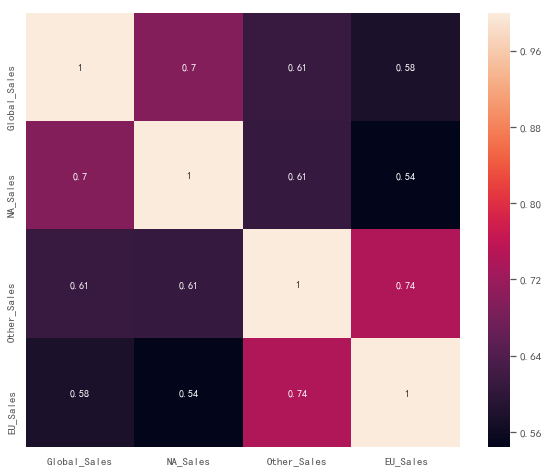

In [83]:
# 计算与售价相关性大于0.5的特征个数
k = len(corrmat[corrmat['Global_Sales'] > 0.5].index)
# 获取前k个重要的特征名
cols = corrmat.nlargest(k,'Global_Sales')['Global_Sales'].index.tolist()
# 计算该k个特征的相关系数
cm = vgsales_04[cols].corr()
# 画出可视化热图
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,square=True)
plt.show()

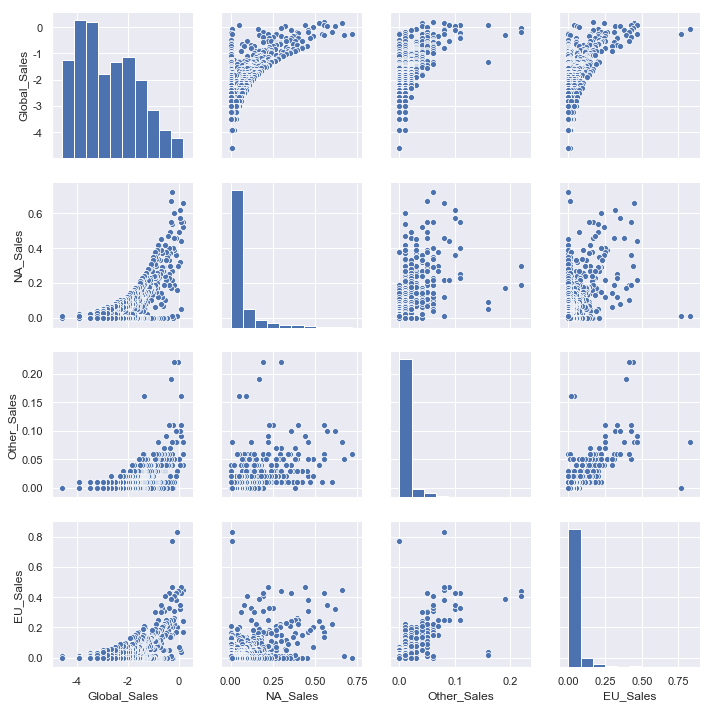

In [84]:
# 对地区销量特征画多变量图
sns.set()
sales = ['Global_Sales','NA_Sales','Other_Sales', 'EU_Sales']
sns.pairplot(vgsales_04[sales], size = 2.5)
plt.show()

In [85]:
vgsales_05=vgsales_04
vgsales_05.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1682,1684,Pok茅Park Wii: Pikachu's Adventure,Wii,2009,Adventure,Nintendo,0.55,0.17,0.42,0.06,0.182322
1704,1706,Metal Gear Solid VR Missions,PS,1999,Adventure,Konami Digital Entertainment,0.66,0.45,0.00,0.08,0.165514
1709,1711,Shenmue,DC,1999,Adventure,Sega,0.52,0.24,0.38,0.04,0.165514
1873,1875,Yakuza 2,PS2,2006,Adventure,Sega,0.05,0.04,0.84,0.16,0.086178
1890,1892,Endless Ocean,Wii,2007,Adventure,Nintendo,0.44,0.47,0.09,0.09,0.086178


由地区销量特征多变量图第1列后3个图可知，基于“NA_Sales”、“Other_Sales”，“EU_Sales”特征分别存在0、5、2个异常值，可以进行剔除

In [86]:
vgsales_05['Other_Sales'].value_counts()

0.00    825
0.01    201
0.02     90
0.03     43
0.04     26
0.05     19
0.06     15
0.08      5
0.11      4
0.10      3
0.07      3
0.16      2
0.22      2
0.09      2
0.19      1
Name: Other_Sales, dtype: int64

In [87]:
vgsales_05['Other_Sales'].describe()

count    1241.000000
mean        0.008437
std         0.019571
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         0.220000
Name: Other_Sales, dtype: float64

In [88]:
vgsales_05['EU_Sales'].value_counts()

0.00    782
0.01     89
0.02     65
0.03     41
0.05     40
0.04     37
0.06     25
0.08     17
0.07     16
0.09     14
0.12     10
0.10     10
0.14      9
0.15      8
0.11      8
0.13      8
0.17      6
0.21      5
0.16      5
0.20      5
0.25      4
0.18      4
0.22      4
0.33      3
0.43      3
0.19      2
0.31      2
0.35      2
0.24      2
0.30      2
0.47      2
0.41      2
0.39      1
0.83      1
0.45      1
0.26      1
0.77      1
0.38      1
0.44      1
0.23      1
0.32      1
Name: EU_Sales, dtype: int64

In [89]:
vgsales_05['EU_Sales'].describe()

count    1241.000000
mean        0.029073
std         0.071625
min         0.000000
25%         0.000000
50%         0.000000
75%         0.020000
max         0.830000
Name: EU_Sales, dtype: float64

In [90]:
#对基于“Other_Sales”，“EU_Sales”特征分别存在的5个和2个异常值进行了剔除
vgsales_05.drop(vgsales_05[vgsales_05['Other_Sales'] >= 0.16].index, inplace=True)
vgsales_05.drop(vgsales_05[vgsales_05['EU_Sales'] >= 0.77].index, inplace=True)

In [91]:
# 查看数据维度 
vgsales_05.shape

(1234, 11)

In [92]:
# 分别计算“NA_Sales”、“Other_Sales”、“EU_Sales”的偏度skewness and 峰度kurtosis
print("NA_Sales的偏度是: %f" % vgsales_05['NA_Sales'].skew())
print("NA_Sales的峰度是: %f" % vgsales_05['NA_Sales'].kurt())
print("Other_Sales的偏度是: %f" % vgsales_05['Other_Sales'].skew())
print("Other_Sales的峰度是: %f" % vgsales_05['Other_Sales'].kurt())
print("EU_Sales的偏度是: %f" % vgsales_05['EU_Sales'].skew())
print("EU_Sales的峰度是: %f" % vgsales_05['EU_Sales'].kurt())

NA_Sales的偏度是: 2.933541
NA_Sales的峰度是: 10.064955
Other_Sales的偏度是: 3.152048
Other_Sales的峰度是: 12.378715
EU_Sales的偏度是: 3.696667
EU_Sales的峰度是: 16.592480


In [93]:
#3项特征全部高度左偏，对其使用ln(x+1)进行转化
vgsales_05['NA_Sales']=np.log1p(vgsales_05['NA_Sales'])
vgsales_05['Other_Sales']=np.log1p(vgsales_05['Other_Sales'])
vgsales_05['EU_Sales']=np.log1p(vgsales_05['EU_Sales'])
print("NA_Sales的偏度是: %f" % vgsales_05['NA_Sales'].skew())
print("NA_Sales的峰度是: %f" % vgsales_05['NA_Sales'].kurt())
print("Other_Sales的偏度是: %f" % vgsales_05['Other_Sales'].skew())
print("Other_Sales的峰度是: %f" % vgsales_05['Other_Sales'].kurt())
print("EU_Sales的偏度是: %f" % vgsales_05['EU_Sales'].skew())
print("EU_Sales的峰度是: %f" % vgsales_05['EU_Sales'].kurt())

NA_Sales的偏度是: 2.556279
NA_Sales的峰度是: 7.181200
Other_Sales的偏度是: 3.055333
Other_Sales的峰度是: 11.512061
EU_Sales的偏度是: 3.339846
EU_Sales的峰度是: 13.175149


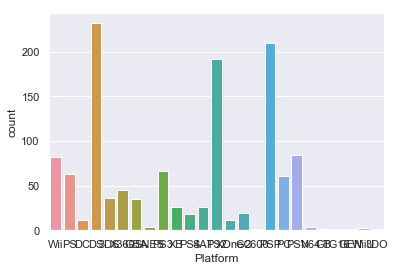

In [94]:
# 查看非线性特征，不同平台的游戏销售量
# 画出直方图，查看呈现规律
sns.countplot(x='Platform',data=vgsales_05)
plt.show()

In [95]:
# 查看数据特征类型, 即除Global_Sales的列，有数值类型(numerical)和类别类型（category）
# 统计数值类型(numerical)特征名，保存为列表
numeric=[f for f in vgsales_05.drop(['Global_Sales'],axis=1).columns 
         if vgsales_05.drop(['Global_Sales'],axis=1).dtypes[f]!='object']
# 统计类别类型（category）特征名，保存为列表
category=[f for f in vgsales_05.drop(['Global_Sales'],axis=1).columns 
          if vgsales_05.drop(['Global_Sales'],axis=1).dtypes[f]=='object']
# 输出数值类型(numerical)特征个数，类型（category）特征个数
print("numeric: {}, category: {}" .format (len(numeric),len(category)))

numeric: 5, category: 5


In [96]:
# 对类别型数据做方差分析
# 定义方差函数，返回p-value值，其值越小对应特征越重要
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = category
    pvals = []
    for c in category:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['Global_Sales'].values
            samples.append(s)
        # stats.f_onewaym模块包用于计算p-value
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    # 将特征根据p-value排序
    return anv.sort_values('pval')

# 将data带入定义的方差函数
a = anova(vgsales_05)
# 输出a
a

,feature,pval
4,Publisher,1.113982e-90
1,Platform,1.287229e-51
2,Year,1.561032e-21
0,Name,2.165685e-16
3,Genre,NaN


In [98]:
# 重要数值型特征数据整合
# 用新的 nf 构建数据集
# 选择相关性大于0.5的重要数值型特征
nf = vgsales_05[cols]
nf['NA_Sales']=vgsales_05['NA_Sales']
nf['Other_Sales']=vgsales_05['Other_Sales']
nf['EU_Sales']=vgsales_05['EU_Sales']
nf.head()

,Global_Sales,NA_Sales,Other_Sales,EU_Sales
1682,0.182322,0.438255,0.058269,0.157004
1704,0.165514,0.506818,0.076961,0.371564
1709,0.165514,0.418710,0.039221,0.215111
1890,0.086178,0.364643,0.086178,0.385262
1899,0.076961,0.438255,0.104360,0.357674


In [102]:
# 对于类别型数据，根据方差分析，选取排名重要的4个特征
features = a['feature'].tolist()[0:4]
# 合并特征
nf1 = pd.concat([nf, vgsales_05[features]], axis=1)
nf1.head()

,Global_Sales,NA_Sales,Other_Sales,EU_Sales,Publisher,Platform,Year,Name
1682,0.182322,0.438255,0.058269,0.157004,Nintendo,Wii,2009,Pok茅Park Wii: Pikachu's Adventure
1704,0.165514,0.506818,0.076961,0.371564,Konami Digital Entertainment,PS,1999,Metal Gear Solid VR Missions
1709,0.165514,0.418710,0.039221,0.215111,Sega,DC,1999,Shenmue
1890,0.086178,0.364643,0.086178,0.385262,Nintendo,Wii,2007,Endless Ocean
1899,0.076961,0.438255,0.104360,0.357674,Electronic Arts,DS,2009,MySims Agents


In [103]:
# 查看特征维度
nf1.shape

(1234, 8)

In [104]:
# 将所有的类别型特征，one-hot编码
nf2 = pd.get_dummies(nf1)
# 查看数据维度
nf2.shape

(1234, 1268)

In [105]:
# 构建模型
# 导入GBDT算法
from sklearn.ensemble import GradientBoostingRegressor
# 导入均方误差计算
from sklearn.metrics import mean_squared_error
# 导入标准化模块包
from sklearn.preprocessing import RobustScaler
# 导入划分数据集包，交叉验证包
from sklearn.model_selection import train_test_split,KFold,cross_val_score
# 导入Xgboost算法包
import xgboost as xgb

In [107]:
# 特征标准化
x = RobustScaler().fit_transform(nf2.drop(['Global_Sales'], axis=1).values)
# 提取标签
y = nf2['Global_Sales'].values

In [108]:
# 定义验证函数,使用5折交叉验证，采用均方根误差判别，返回均方根误差
def rmse_cv(model):
    # 将数据集shuffle打乱，划分成五分
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    # 计算均方根误差，其输出结果有五个
    rmse= np.sqrt(-cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv = kf))
    return rmse

In [109]:
# GBDT算法
# 使用GBDT算法，构建模型
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.005,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score1 = rmse_cv(GBoost)
# 输出五个均方根误差的平均值RSME和其标准差SD,保留4位小数
print("Gradient Boosting score: RSME={:.4f} (SD={:.4f})\n".format(score1.mean(),score1.std()))

Gradient Boosting score: RSME=0.6555 (SD=0.0211)



In [110]:
# Xgboost算法
# Xgboost算法,构建模型
Xgboost = xgb.XGBRegressor(colsample_bytree=0.36, gamma=0.042, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.88, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state = 1, nthread = -1)
score2 = rmse_cv(Xgboost)
# 输出五个均方根误差的平均值RSME和其标准差SD,保留4位小数
print("Xgboost score: RSME={:.4f} (SD={:.4f})\n".format(score2.mean(),score2.std()))

[06:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false

In [111]:
# 将80%数据作为训练集，20%数据作为测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# 定义回归拟合图,以预测值输入
def drawing(y_hat):
    # 获取预测的测试集从小到大排序的索引
    order = np.argsort(y_hat)
    # 将测试集和预测的测试集按索引排序
    y_test_new = y_test[order]
    y_hat = y_hat[order]
    # 画图展示
    plt.figure(figsize=(8, 6),facecolor='w')
    t = np.arange(len(y_test))
    plt.plot(t, y_test_new, 'b-', linewidth=2, label='True')
    plt.plot(t, y_hat, 'r-', linewidth=2, label='Predicted')
    plt.legend(loc='upper left')
    plt.grid(b=True)
    plt.show()

RMSE =  0.6312
R2_train = 0.7051
R2_test = 0.7187


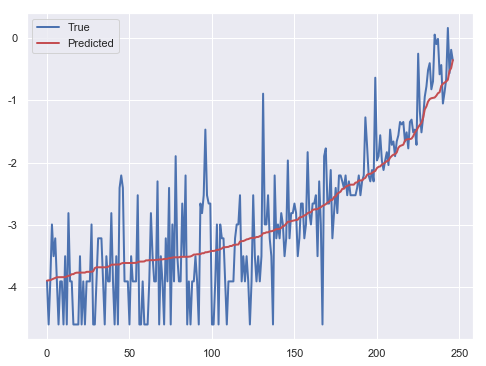

In [112]:
# 使用GBDT算法，构建模型
# 训练集训练
GBoost.fit(x_train, y_train)
# 测试集结果预测
y_hat1 = GBoost.predict(x_test)
# 分别输出均方根误差RMSE，训练集和测试集的拟合优度R2
print("RMSE =  %.4f" % np.sqrt(np.mean((y_hat1 - y_test) ** 2)))
print('R2_train = %.4f' % GBoost.score(x_train, y_train))
print('R2_test = %.4f' % GBoost.score(x_test, y_test))
# 画出拟合效果图，蓝色表示真实值，红色为预测值
drawing(y_hat1)

[06:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE =  0.5824
R2_train = 0.7051
R2_test = 0.7187


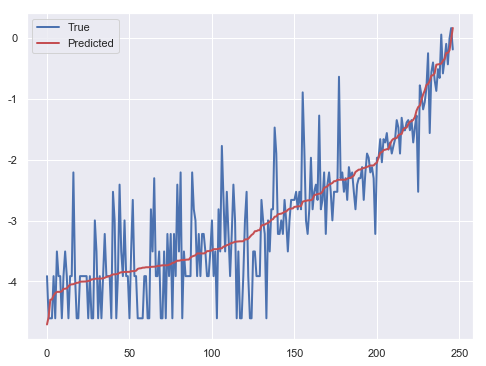

In [113]:
# 使用Xgboost算法，构建模型
# 训练集训练
Xgboost.fit(x_train, y_train)
# 测试集结果预测
y_hat2 = Xgboost.predict(x_test)
# 分别输出均方根误差RMSE，训练集和测试集的拟合优度R2
print("RMSE =  %.4f" % np.sqrt(np.mean((y_hat2 - y_test) ** 2)))
print('R2_train = %.4f' % GBoost.score(x_train, y_train))
print('R2_test = %.4f' % GBoost.score(x_test, y_test))
# 画出拟合效果图 ，蓝色表示真实值，红色为预测值
drawing(y_hat2)